In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [4]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [5]:
target = '천호동'
target_purpose = '준주거'
계약일자시점 = 2018

In [6]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))&(common_df['계약날짜'].dt.year >= 계약일자시점)].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(63, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
6276,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-11-09,18.14,23300.0,1284.454245,4246.129576,상업/업무,49.0
6277,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-11-09,18.14,23300.0,1284.454245,4246.129576,상업/업무,49.0
6272,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-09-27,36.27,45700.0,1259.994486,4165.270871,상업/업무,49.0
19487,서울특별시 강동구 천호동,191-40,준주거지역,8m미만,2020-11-21,35.70,43500.0,1218.487395,4028.057353,연립/다세대,30.0
6264,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-03-29,36.27,42700.0,1177.281500,3891.839523,상업/업무,49.0


In [7]:
#target_df = target_df[target_df['단가(평)'] <= 5000]

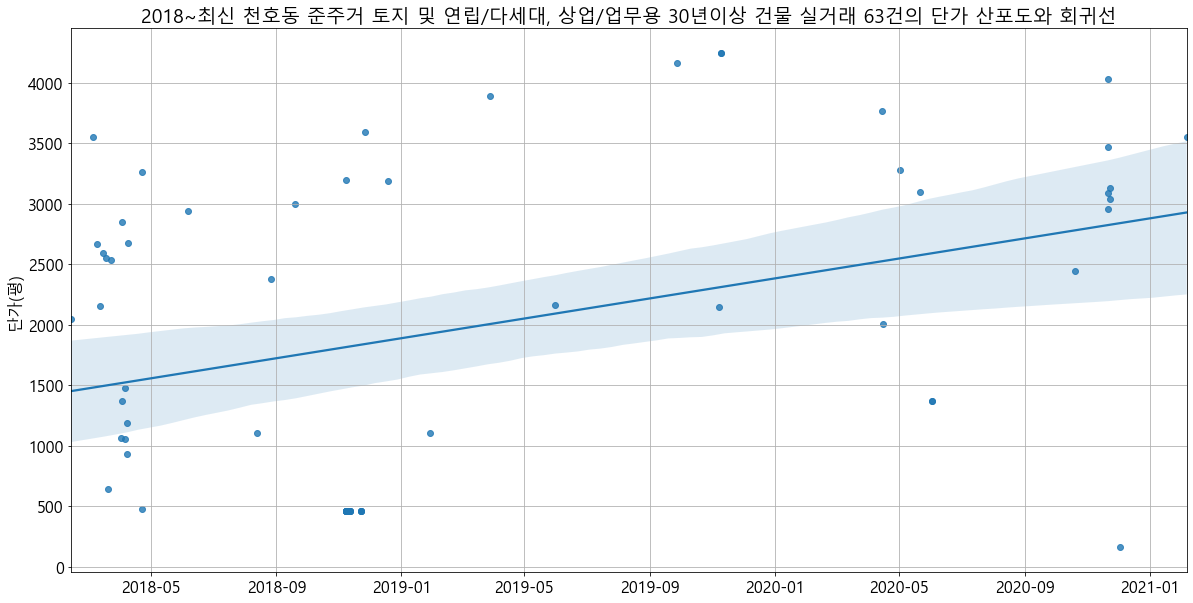

In [8]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

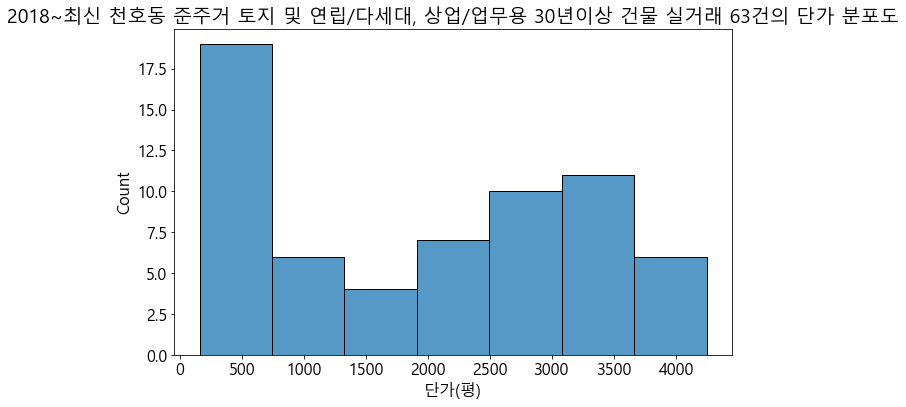

거래량: 63.0
평균: 1977.795839074678
표준편차: 1293.1694308694632
최소: 160.47500000000002
25분위: 462.8099
중간값: 2146.28091125
75분위: 3091.538037508315
최대: 4246.129575523704


<Figure size 432x288 with 0 Axes>

In [9]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(10,6))
plt.title('{}~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.savefig(basedir + '{}{}/분포도.png'.format(target, target_purpose))
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])


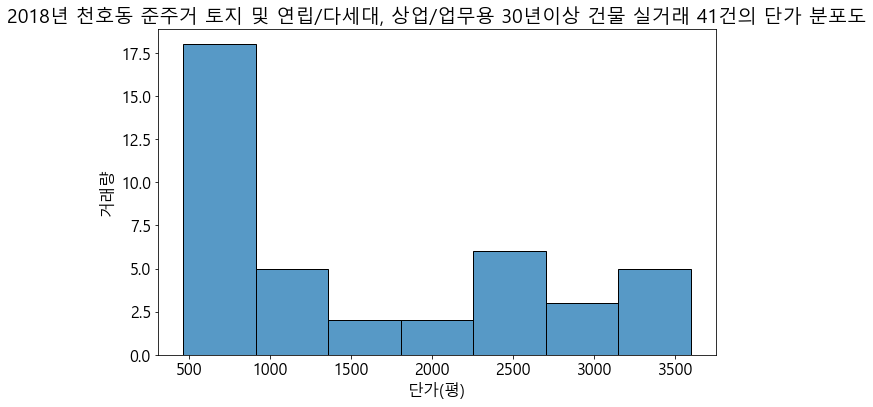

거래량: 41.0
평균: 1509.4107004151924
표준편차: 1130.9557104574958
최소: 462.45822074468094
25분위: 462.8099
중간값: 1061.0817189818367
75분위: 2587.769955898567
최대: 3594.0691767068274


<Figure size 432x288 with 0 Axes>

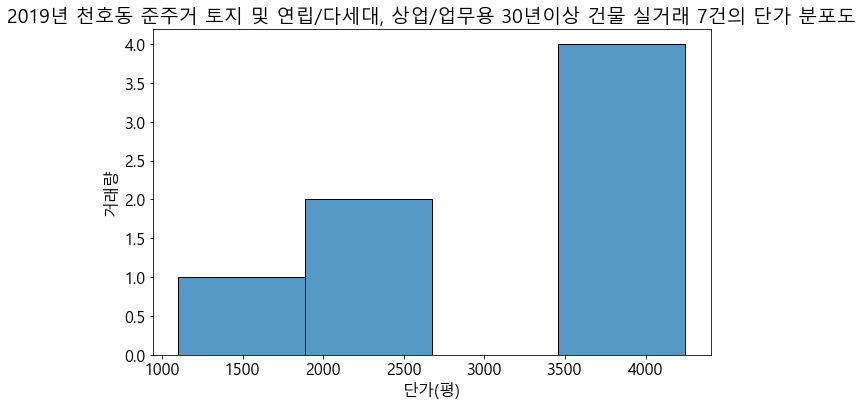

거래량: 7.0
평균: 3136.9362611855327
표준편차: 1301.796876104414
최소: 1099.6084842105265
25분위: 2154.787899387781
중간값: 3891.839523021781
75분위: 4205.700223383578
최대: 4246.129575523704


<Figure size 432x288 with 0 Axes>

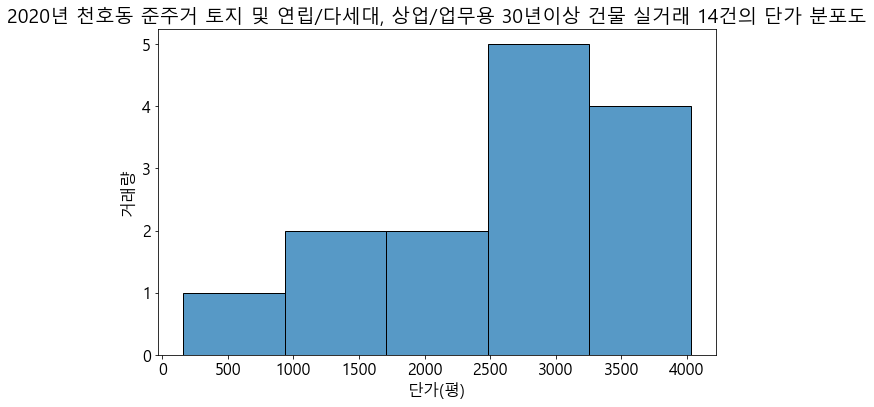

거래량: 14.0
평균: 2657.626099872193
표준편차: 1074.5007582059077
최소: 160.47500000000002
25분위: 2113.734166933419
중간값: 3063.396543560606
75분위: 3242.665546998292
최대: 4028.057352941176


<Figure size 432x288 with 0 Axes>

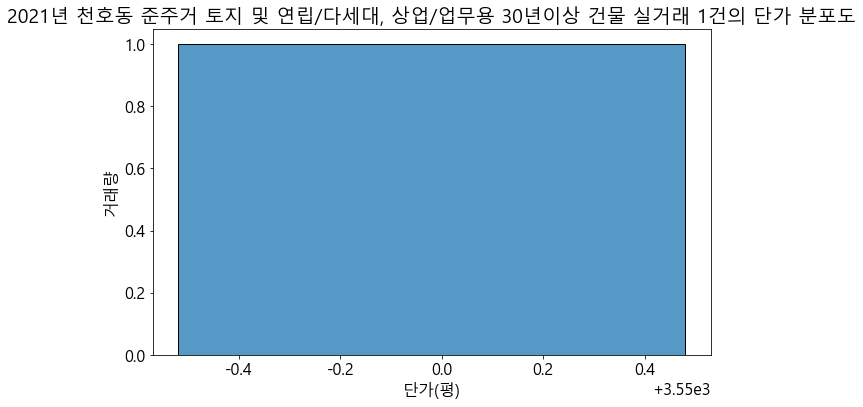

거래량: 1.0
평균: 3549.979918172414
표준편차: nan
최소: 3549.979918172414
25분위: 3549.979918172414
중간값: 3549.979918172414
75분위: 3549.979918172414
최대: 3549.979918172414


<Figure size 432x288 with 0 Axes>

In [10]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.savefig(basedir + '{}{}/{}분포도.png'.format(target, target_purpose, year))
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [15]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [16]:
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-11-09,18.14,23300.0,1284.454245,4246.129576,상업/업무,49.0
1,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-11-09,18.14,23300.0,1284.454245,4246.129576,상업/업무,49.0
2,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-09-27,36.27,45700.0,1259.994486,4165.270871,상업/업무,49.0
3,서울특별시 강동구 천호동,191-40,준주거지역,8m미만,2020-11-21,35.70,43500.0,1218.487395,4028.057353,연립/다세대,30.0
4,서울특별시 강동구 천호동,4**,준주거,8m미만,2019-03-29,36.27,42700.0,1177.281500,3891.839523,상업/업무,49.0
5,서울특별시 강동구 천호동,4**,준주거지역,-,2020-04-14,33.00,37620.0,1140.000000,3768.594900,토지,NaN
6,서울특별시 강동구 천호동,4**,준주거,8m미만,2018-11-26,34.86,37900.0,1087.205967,3594.069177,상업/업무,48.0
7,서울특별시 강동구 천호동,1**,준주거지역,8m미만,2021-02-06,145.00,155711.0,1073.868966,3549.979918,토지,NaN
8,서울특별시 강동구 천호동,4**,준주거,25m미만,2018-03-06,30.75,33000.0,1073.170732,3547.671707,상업/업무,44.0
9,서울특별시 강동구 천호동,191-40,준주거지역,8m미만,2020-11-21,35.71,37500.0,1050.126015,3471.490829,연립/다세대,30.0


In [17]:
target_df.tail(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
43,서울특별시 강동구 천호동,4**,준주거지역,-,2018-04-08,7.82,2209.0,282.480818,933.820852,토지,NaN
44,서울특별시 강동구 천호동,3**,준주거지역,-,2018-03-20,29.00,5600.0,193.103448,638.358483,토지,NaN
45,서울특별시 강동구 천호동,1**,준주거지역,-,2018-04-23,3.50,500.0,142.857143,472.255000,토지,NaN
46,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-08,20.00,2800.0,140.000000,462.809900,토지,NaN
47,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-12,3.75,525.0,140.000000,462.809900,토지,NaN
48,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-08,10.00,1400.0,140.000000,462.809900,토지,NaN
49,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-08,10.00,1400.0,140.000000,462.809900,토지,NaN
50,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-23,3.75,525.0,140.000000,462.809900,토지,NaN
51,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-23,20.00,2800.0,140.000000,462.809900,토지,NaN
52,서울특별시 강동구 천호동,4**,준주거지역,-,2018-11-23,10.00,1400.0,140.000000,462.809900,토지,NaN


In [19]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/{}{}/{}_{}_땅값분석.xlsx'.format(target, target_purpose, target, target_purpose), index=False)